# Similitud de Strings Usando la Métrica del Coseno Para Crear un Modelo de Name Matching

****
## __Objetivo__ : encontrar coincidencias entre strings de una manera rápida y eficaz.

### __Vamos a ver__ : 
1. Ngram
2. TF-IDF(Term Frequency-Inverse Document Frequency)
3. Vectorización
4. Similitud del Coseno con la librería __sparse_dot_topn__
5. Ejemplo de la Aplicación de Modelo.

****
### 1. __N-gram__.

##### Un N-gram es una cadena conectada de __N__ elementos de una muestra de texto o discurso. El N-gram podría estar compuesto por grandes bloques de palabras o conjuntos más pequeños de sílabas. Los N-grams se utilizan como base para el funcionamiento de los modelos N-gram, que son fundamentales en el procesamiento del lenguaje natural como una forma de predecir el texto.

##### Consieremos la siguiente frase: "__Esto es un N-gram__"
##### La descpmposicón en N-grams de dicha frase para __n__ = 1, 2 y 3 sería la siguiente:

<table ><tr><th >1-gram(uni-gram)<th><th> 2-gram(bi-gram) <th><th> 3-gram(tri-gram) <tr><tr>
<tr><td> Esto<td><td> Esto es <td><td> Esto es un <td><tr>
<tr><td> es <td><td> es un <td><td> es un N-gram <td><tr>
<tr><td> un <td><td> un N-gram <td><td>   <td><tr>
<tr><td> N-gram <td><td>   <td><td>  <td><tr><table>


##### La fórmula de un N-gram para cualquier N es:
$$
\text{N-gram}_{S} = N_{S} - (N - 1),
$$

$$
\text{donde } N_S\text{ es el número de palabras en una sentencia S.}
$$

******

### Implementación de la función ngram que da como resultado los N-grams de una sentencia dada para cualquier N 

<div style="border-left:solid green 4px">

In [1]:
# librerías
import nltk
nltk.download('punkt')
from rich.progress import track
from nltk import ngrams, word_tokenize
from nltk.util import flatten

text = "Esto es un N-gram"
tokenize = word_tokenize(text)
ngrams(tokenize, 3)
ngrams ; # -> Objeto zip es un iterador de tuplas donde el primer elemento de cada iterador pasado se empareja, y luego el segundo elemento de cada iterador pasado se empareja, etc.
[ ' '.join(grams) for grams in ngrams(tokenize, 2)]


[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['Esto es', 'es un', 'un N-gram']

In [2]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def n_grams(text:str ,n: int = 1) -> list:
    
  only_words = [word for word in track(text.split(" "), description="[cyan]Removing stop words...") if word not in set(stopwords.words('english'))]  
  print("Sentiencia después de remover los stopwords:", only_words)
  temp = zip(*[only_words[i:] for i in range(0, n)])
  n_gram =[' '.join(ngram) for ngram in track(temp, description="[gree]Setting n-grams...")]
  return n_gram

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
ng = n_grams("Esto es un N-gram", n = 3)
print("N-gram:", ng)

Output()

Output()

Sentiencia después de remover los stopwords: ['Esto', 'es', 'un', 'N-gram']


N-gram: ['Esto es un', 'es un N-gram']


__Referencias y recursos adicionales__:
1. [N-gram Language Models](https://web.stanford.edu/~jurafsky/slp3/3.pdf)
2. [3 1 Introduction to N grams 8 41](https://www.youtube.com/watch?v=hM49MPmakNI&t=1s)


##### __Nota__. Para el caso en cuestión se utilizó el tri-gram o N-gram para  N = 3. 
##### __Justificación__: tanto los bi-grams y los tri-grams pueden capturar información contextual en comparación con solo los uni-grams. Por ejemplo, "Un día perfecto para pasear" tiene más significado que solo "Día", "Perfecto" y "Pasear" cuando se observan de forma independiente.

***
### 2. __TI-DIF__.

##### Term Frequency-Inverse Document Frequency o TF-IDF. El peso TF-IDF es un peso que se usa a menudo en la recuperación de información y la extracción de texto, dos preocupaciones principales.

1. Se usa para evaluar qué tan importante es una palabra para un documento en una colección

2. La importancia aumenta proporcionalmente al número de veces que aparece una palabra

##### __Dos ideas detrás de TF-IDF__.

##### __Frecuencia de término o TF__ por sus siglas en inglés, también conocido como número de veces que aparece una palabra en un documento, dividido por el número total de palabras en ese documento, es decir, mide la frecuencia con la que aparece un término en un documento.

##### __Frecuencia Inversa de Documentos(IDF)__, calculada como el logaritmo del número de documentos en el corpus dividido por el número de documentos donde aparece el término específico, es decir, mide qué tan importante es un término.

Puntuación TF-IDF para el término  $i$ en el documento $j$ = $TF(i,j)*IDF(j)$,


$$
\text{donde TF}(i, j)=\frac{\text { Frecuencia del Término i en el Documento j}}{\text { Total de palabras en el documento j}},\\
\text{IDF}(i)=\log _{2}\left(\frac{\text { Total de documentos }}{\text { Documentos con el término } i}\right).\\
$$

##### __Observación__: Al calcular TF, todos los términos son igualmente importantes. Sin embargo, se sabe que palabras específicas, como “es”, “de” y “eso”, pueden aparecer muchas veces pero tienen poca importancia.

****
### 3. __Vectorización__

##### Ya que tenemos los N-grams, es necesario convertir cada uno de esos tokens (lemas) en un vector con el que puedan trabajar los modelos de algoritmos de SciKit-Learn, ya que estos algoritmos solo entienden el concepto de características numéricas independientemente de su tipo subyacente (texto, imagen, y números, etc.) permitiéndonos realizar tareas complejas de aprendizaje automático sobre diferentes tipos de datos.

##### El __Tfidfvectorizer__ de Scikit-learn tiene como objetivo convertir una colección de documentos sin procesar en una matriz de funciones TF-IDF, y puede calcular los valores de conteo de palabras, IDF y TF-IDF a la vez.

##### Con esto, generamos __tf_idf_matrix__, que es una matriz dispersa como con __Tfidfvectorizer__, estamos convirtiendo texto sin procesar en una representación vectorial numérica de palabras y n-gramas. Esto hace que sea fácil de usar directamente como ya se dijo; los algoritmos solo entienden el concepto de características numéricas independientemente de su tipo subyacente (texto, imagen, números, etc.).

#### __Ejemplo__:

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
   'Este es el primer documento.',
   'Este documento es el segundo documento.',
   'Y este es el tercero.',
   '¿Es este el primer documento?',
]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()
print(X)

  (0, 0)	0.46979138557992045
  (0, 4)	0.5802858236844359
  (0, 1)	0.38408524091481483
  (0, 2)	0.38408524091481483
  (0, 3)	0.38408524091481483
  (1, 5)	0.5386476208856763
  (1, 0)	0.6876235979836938
  (1, 1)	0.281088674033753
  (1, 2)	0.281088674033753
  (1, 3)	0.281088674033753
  (2, 6)	0.7418700560027411
  (2, 1)	0.38713857123192547
  (2, 2)	0.38713857123192547
  (2, 3)	0.38713857123192547
  (3, 0)	0.46979138557992045
  (3, 4)	0.5802858236844359
  (3, 1)	0.38408524091481483
  (3, 2)	0.38408524091481483
  (3, 3)	0.38408524091481483


__Docs__:
1. [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)


****

### 4. __Similitud del Coseno__

In [5]:
from IPython.display import Image

#### La métrica del coseno mide la similitud(cercanía) entre dos vectores calculando el coseno del ángulo entre ellos y determina si dos vectores apuntan aproximadamente hacia la misma dirección. A menudo se utiliza para medir la similitud del documento en el análisis de texto.
#### Se define de la siguiente manera:

$$
\text { Similitud del Coseno }=Sim(\mathbf{A}, \mathbf{B}):=\cos (\theta)=\frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\|\|\mathbf{B}\|}=\frac{\sum_{i=1}^{n} A_{i} B_{i}}{\sqrt{\sum_{i=1}^{n} A_{i}^{2}} \sqrt{\sum_{i=1}^{n} B_{i}^{2}}},
$$

$$ \text{donde } A_{i} \text{ y } B_{i} \text{ son componentes de los vectores } \mathbf{A} \text{ y } \mathbf{B}\text{, respectivamente.}
$$

In [6]:
Image(url="cosin-similarity.png", width=500, height=500)

### __Implementación básica del la similitud del coseno__

Consideremos los vectores $\vec{v_{1}}=(-4,5,3)$, $\vec{v_{2}}=(5,2,-9) $ y $\vec{v_{3}}=(-10,5,-9)$, los cuales compararemos con el vector $w=(-8,14,10)$.

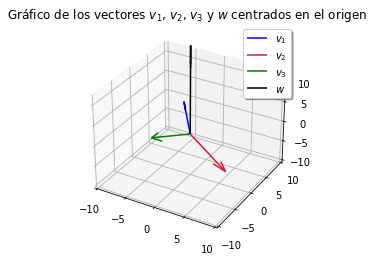

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

v1 = [-4,5,3]
v2 = [5,2,-9]
v3 = [-10,5,-9]
w = [-8,14,10]
origin = [0,0,0]
X, Y, Z = zip(origin,origin,origin) 
U, V, W = zip(v1,v2,v3)

# plot de los vectores
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([-10, 12])
ax.quiver(0,0,0,-4,5,3, arrow_length_ratio=0.25,color = ['blue'], label='$v_1$')
ax.quiver(0,0,0,5,2,-9, arrow_length_ratio=0.25,color = ['crimson'], label='$v_2$')
ax.quiver(0,0,0,-10,5,-9, arrow_length_ratio=0.25,color = ['green'], label='$v_3$')
ax.quiver(0,0,0,-8,14,10, arrow_length_ratio=0.25,color = ['black'], label='$w$')
plt.title('Gráfico de los vectores $ v_1$, $ v_2$, $ v_3$ y $ w$ centrados en el origen')
ax.legend(shadow=True, fancybox=True)
plt.show()

In [8]:
import numpy as np
from numpy.linalg import norm
 
# Definimos un array para los vectores
V = np.array([[-4,5,3],[5,2,-9],[-10,5,-9]])
v1, v2, v3 = V[0], V[1], V[2]
w = np.array([-8,14,10])
print(f"v1={v1}, v2={v2}, v3={v3}")
print("w:\n", w)
 
# Definición de la función para calcular la similitud del coseno
def cosine_similarity(V:np.array,w:np.array) ->np.array:
    return np.dot(V,w)/(norm(V, axis=1)*norm(w))

resultado = cosine_similarity(V,w)   
print("Similitud del coseno de w con respecto a v1,v2 y v3:\n", resultado)
print(f"Vector más cercano a w : v{np.argmax(resultado)+1}={V[np.argmax(resultado)]}, similitud:{resultado[np.argmax(resultado)]} \n")

v1=[-4  5  3], v2=[ 5  2 -9], v3=[-10   5  -9]
w:
 [-8 14 10]
Similitud del coseno de w con respecto a v1,v2 y v3:
 [ 0.98386991 -0.51256929  0.22032632]
Vector más cercano a w : v1=[-4  5  3], similitud:0.9838699100999073 



__Recursos adicionales__
1. [Aquí una breve introducción a la similitud de coseno con python](https://www.machinelearningplus.com/nlp/cosine-similarity/)
2. [Algunos ejemplos de gráficos en 3D](https://www.geeksforgeeks.org/introduction-to-3d-plotting-with-matplotlib/)
3. [Barras de progreso con la librería rich](https://rich.readthedocs.io/en/stable/progress.html#basic-usage)
4. [Type hinting](https://docs.python.org/3/library/typing.html)

'Barras de progreso'

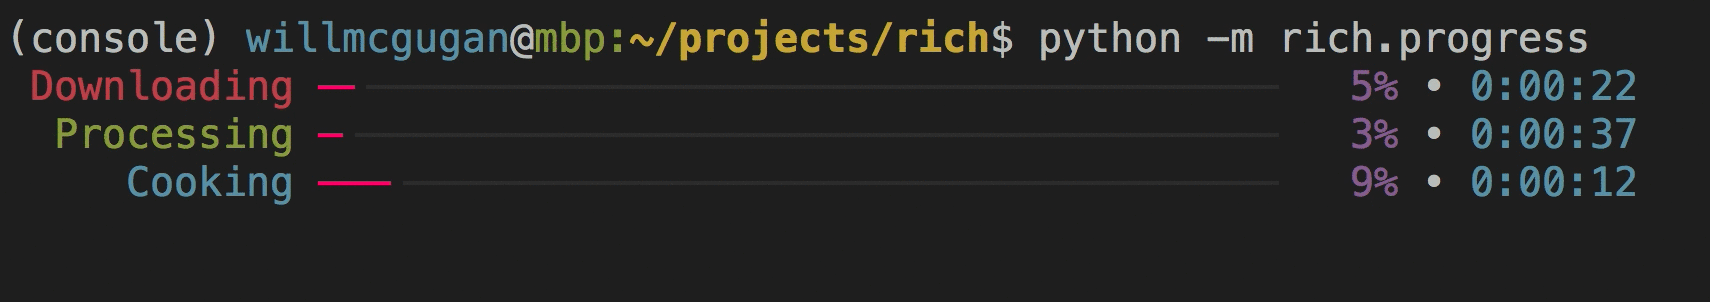

In [9]:
from IPython.display import Image
display("Barras de progreso",Image(data=open('progress.gif','rb').read(), format='png', height='10'))

***
## __Implementación del algoritmo__


### Similitud de coseno con __sparse_dot_topn__

In [10]:
from sparse_dot_topn import awesome_cossim_topn 
import pandas as pd, numpy as np, re, sparse_dot_topn.sparse_dot_topn as ct
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix
from rich.live import Live
import time

In [11]:
elektra_df = pd.read_csv('productos_publicados.csv', low_memory = False)
elektra_df.head(3)

,productid,productname,href,releasedate,sellerid,sellername,categoria,brandname,avg_price,avg_listprice,vtex_inventory,unq_skus,publicday
0,1500546733,Set 4 Fundas p/ Almohadas. (2 Std + 2 King) Lu...,www.elektra.mx/set-4-fundas-p--almohadas---2-s...,2022-06-17,almoda,ALMODA,Hogar,ALMODA,699.0,699.0,10,1,2022-08-10
1,1500556824,"Molino Eléctrico Para Café De Grano, Frutos Se...",www.elektra.mx/molino-electrico-para-cafe-de-g...,2022-07-20,alpesa,Alpesa,Línea blanca,BOGNER,875.0,875.0,10,1,2022-08-10
2,1500534717,Silla Alta Periquera Cosco Trend Verde,www.elektra.mx/silla-alta-periquera-cosco-tren...,2022-04-27,babyvalue,Baby Value,Bebés y juguetes,COSCO,2899.0,2899.0,305,1,2022-08-10


In [12]:
coppel_df = pd.read_csv("promociones_coppel.csv", low_memory = False)
coppel_df.head(3)

,index,nombre,precio,precioanterior,preciounico,plazo,quincenas_24,marca,sku,href,nombrepromocion,categoria,fechadeconsulta
0,2,Sala Esquinera Contemporánea Antara,11999.0,13199.0,0.0,24,438.0,ARTABAN,4467263,https://www.coppel.com/hogar/muebles/salas/sal...,Anuncio: Hasta 30% de descuento en salas. Puls...,Hogar,2022-06-22
1,6,Sofá Bolonia Contemporáneo,0.0,0.0,7099.0,24,438.0,MARBY,4467263,https://www.coppel.com/hogar/muebles/salas/sal...,Anuncio: Hasta 30% de descuento en salas. Puls...,Hogar,2022-06-22
2,10,Sofá Vivian Contemporáneo,6699.0,7299.0,0.0,24,438.0,ARTABAN,4467263,https://www.coppel.com/hogar/muebles/salas/sal...,Anuncio: Hasta 30% de descuento en salas. Puls...,Hogar,2022-06-22


In [13]:
def ngrams(string, n=3):
    string = (re.sub(r'[,-./]|\sBD',r'', string)).upper()
    ngrams = zip(*[string[i:] for i in range(n)])
    return [''.join(ngram) for ngram in ngrams]

In [14]:
def get_matches_df(sparse_matrix:csr_matrix, A:pd.DataFrame, B:pd.DataFrame, top = 100) -> pd.DataFrame:
    
    non_zeros = sparse_matrix.nonzero()
    sparserows = non_zeros[0]
    sparsecols = non_zeros[1]

    if top:
        nr_matches = top
    else:
        nr_matches = sparsecols.size

    left_side = [] 
    right_side = [] 
    similairity = np.zeros(nr_matches)
    a_index = []
    b_index = []
    for index in track(range(nr_matches), description = "Getting matches..."):
        left_side.append(A[sparserows[index]])
        right_side.append(B[sparsecols[index]])
        similairity[index] = sparse_matrix.data[index]
        a_index.append(sparserows[index])
        b_index.append(sparsecols[index])

    return pd.DataFrame({'Elektra Side': left_side,
                         'Competing Side': right_side,
                         'Similarity': similairity}), a_index, b_index

In [15]:
vectorizer = TfidfVectorizer(min_df=1, analyzer = ngrams)
tf_idf_matrix_elektra = vectorizer.fit_transform(elektra_df['productname'].astype(str)) 
tf_idf_matrix_coppel = vectorizer.transform(coppel_df['nombre'])

In [16]:
t1 = time.time()
matches = awesome_cossim_topn(tf_idf_matrix_elektra, tf_idf_matrix_coppel.transpose(), 1, 0)
t = time.time()-t1
print("Time:", t)
print("Matches Type:", type(matches))
matches_df,elektra_index,coppel_index = get_matches_df(matches, elektra_df['productname'], coppel_df['nombre'], top=0) 

Output()

Time: 0.26606011390686035
Matches Type: <class 'scipy.sparse.csr.csr_matrix'>


In [17]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [18]:
@interact
def show_articles_more_than(column='Similarity', x = 0.33):
    return matches_df.loc[matches_df[column] >= x]

interactive(children=(Text(value='Similarity', description='column'), FloatSlider(value=0.33, description='x',…

****
__Librerías y recursos adicionales:__

1. __string_grouper__ es una librería que facilita y agiliza la búsqueda de grupos de strings similares dentro de una o varias listas de strings. __string_grouper__ usa tf-idf para calcular similitudes de coseno dentro de una sola lista o entre dos listas de strings. El proceso completo se describe en el blog [Super Fast String Matching in Python](https://github.com/Bergvca/string_grouper)
2. __Binder__ para notebooks interactivas: https://mybinder.org/
3. __Tutorial Zero-to-Binder__: https://the-turing-way.netlify.app/communication/binder/zero-to-binder.html

****
__Lecturas sugeridas__: [Boosting Selection Of Most Similar Entities In Large Scale Datasets](https://www.sun-analytics.nl/posts/2017-07-26-boosting-selection-of-most-similar-entities-in-large-scale-datasets/)